# Partial Uniform State Preparations

The functions `prepare_uniform_trimmed_state` and `prepare_uniform_interval_state` create states with uniform superposition over a discrete interval of the possible states.
Both scale polynomially with the number of qubits.

## Uniform Trimmed State
Function: `prepare_uniform_trimmed_state`

Arguments:

- `m: CInt` - number of states to load.
- `q: QArray[QBit]` - quantum variable to load the state into.

The function loads the following superposition:
$$ |\psi\rangle = \frac{1}{\sqrt{m}}\sum_{i=0}^{m-1}{|i\rangle}$$

### Example

Prepare the following state on a variable of size 4 qubits.:
$$ |\psi\rangle = \frac{1}{\sqrt{3}}\sum_{i=0}^{2}{|i\rangle}$$

In [1]:
import matplotlib.pyplot as plt

from classiq import *


@qfunc
def main(x: Output[QNum]):
    allocate(4, x)
    prepare_uniform_trimmed_state(3, x)


qmod = create_model(main, out_file="prepare_uniform_trimmed_state")
qprog = synthesize(qmod)

In [2]:
result = execute(qprog).result_value()
counts = result.parsed_counts

Text(0, 0.5, 'shots')

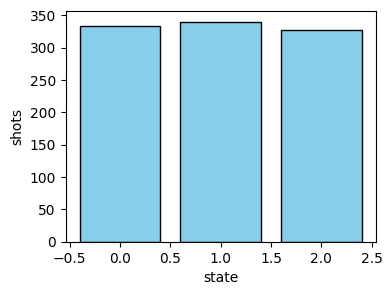

In [3]:
plt.figure(figsize=(4, 3))
plt.bar(
    [c.state["x"] for c in counts],
    [c.shots for c in counts],
    color="skyblue",
    edgecolor="black",
)
plt.xlabel("state")
plt.ylabel("shots")

## Uniform Interval State

Function: `prepare_uniform_interval_state`

Arguments:

- `start: CInt` - first state to be loaded.
- `end: CInt` - boundary of the loaded states (not including).
- `q: QArray[QBit]` - quantum variable to load the state into.

The function loads the following superposition:
$$ |\psi\rangle = \frac{1}{\sqrt{end-start}}\sum_{i=start}^{end-1}{|i\rangle}$$

### Example

Prepare the following state on a variable of size 5 qubits.:
$$ |\psi\rangle = \frac{1}{\sqrt{6}}\sum_{i=2}^{7}{|i\rangle}$$

In [4]:
@qfunc
def main(x: Output[QNum]):
    allocate(5, x)
    prepare_uniform_interval_state(2, 8, x)


qmod = create_model(main, out_file="prepare_uniform_interval_state")
qprog = synthesize(qmod)

In [5]:
result = execute(qprog).result_value()
counts = result.parsed_counts

Text(0, 0.5, 'shots')

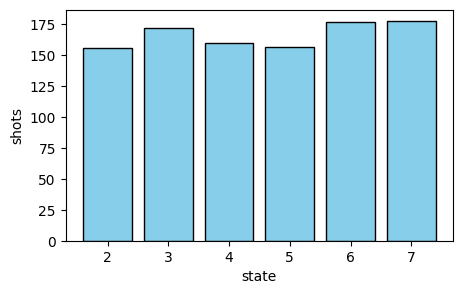

In [6]:
plt.figure(figsize=(5, 3))
plt.bar(
    [c.state["x"] for c in counts],
    [c.shots for c in counts],
    color="skyblue",
    edgecolor="black",
)
plt.xlabel("state")
plt.ylabel("shots")